In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("dataset_part_2.csv")

In [5]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [10]:
custom_palette = {0: "red", 1: "green"}
success_palette = {"Failure": "red", "Success": "green"}
success_map = {0: "Failure", 1: "Success"}
df["Outcome"] = df["Class"].map(success_map)

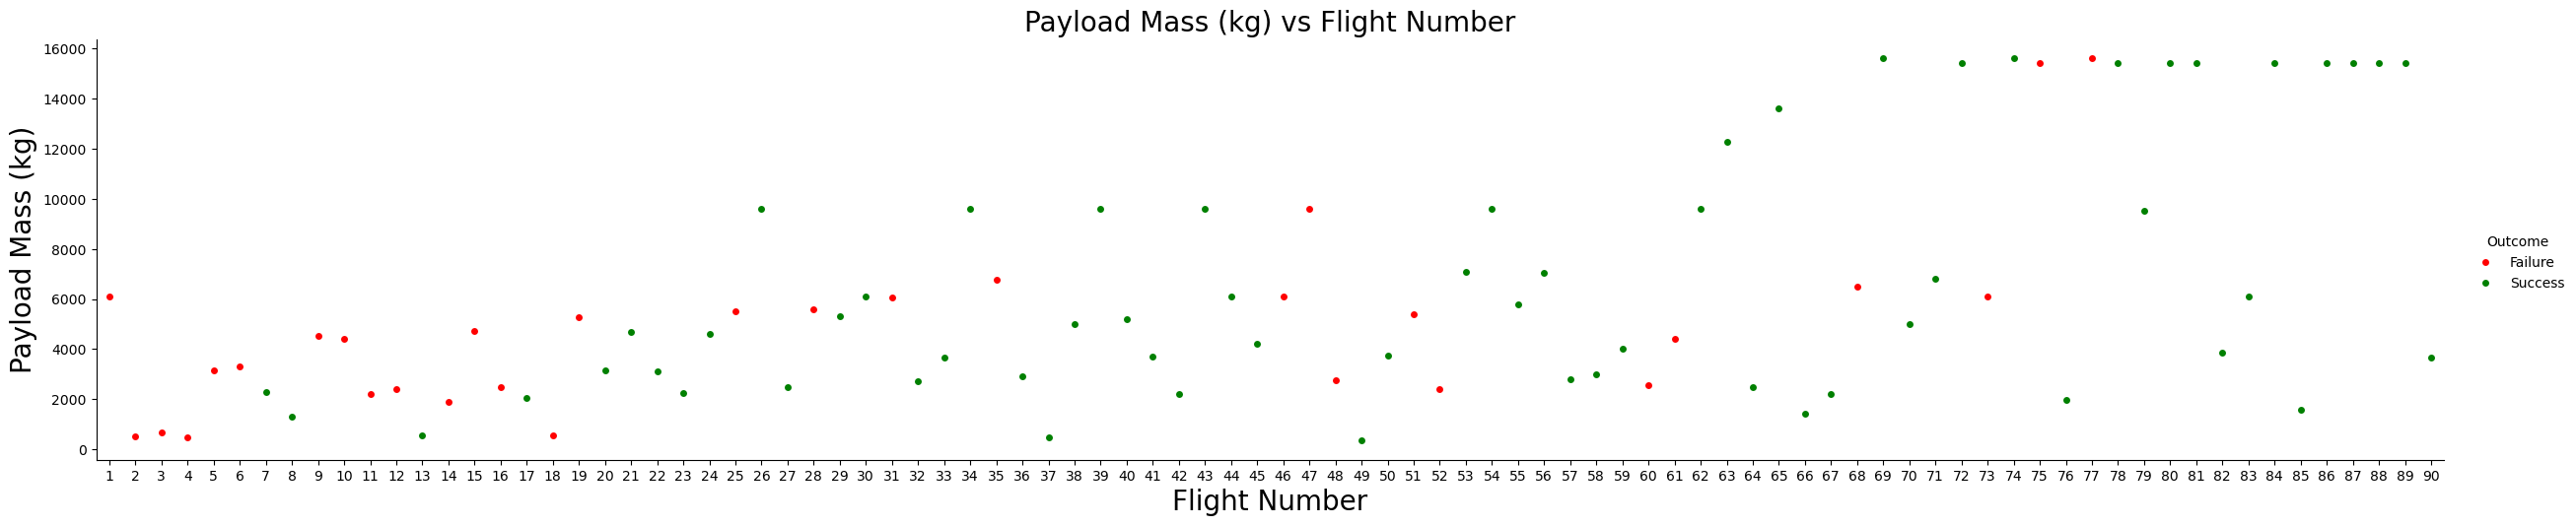

In [12]:
#Start by plotting payload mass vs flightnumber and overlay the launch outcome

sns.catplot(y = "PayloadMass", x = "FlightNumber", data = df, hue = "Outcome", aspect = 5, palette = success_palette)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Payload Mass (kg) vs Flight Number", fontsize=20)
plt.show()
plt.close()

#### Task 1: Visualize the relationship between Flight Number and Launch Site

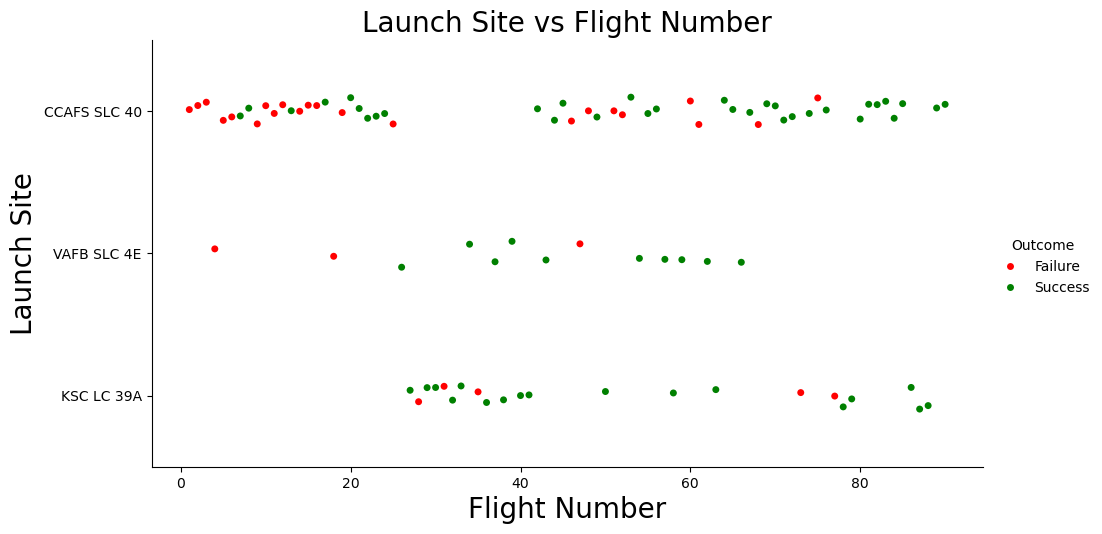

In [14]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", data = df, hue = "Outcome", aspect = 2, palette = success_palette)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Launch Site vs Flight Number", fontsize=20)
plt.show()
plt.close()

#### TASK 2: Visualize the relationship between Payload Mass and Launch Site

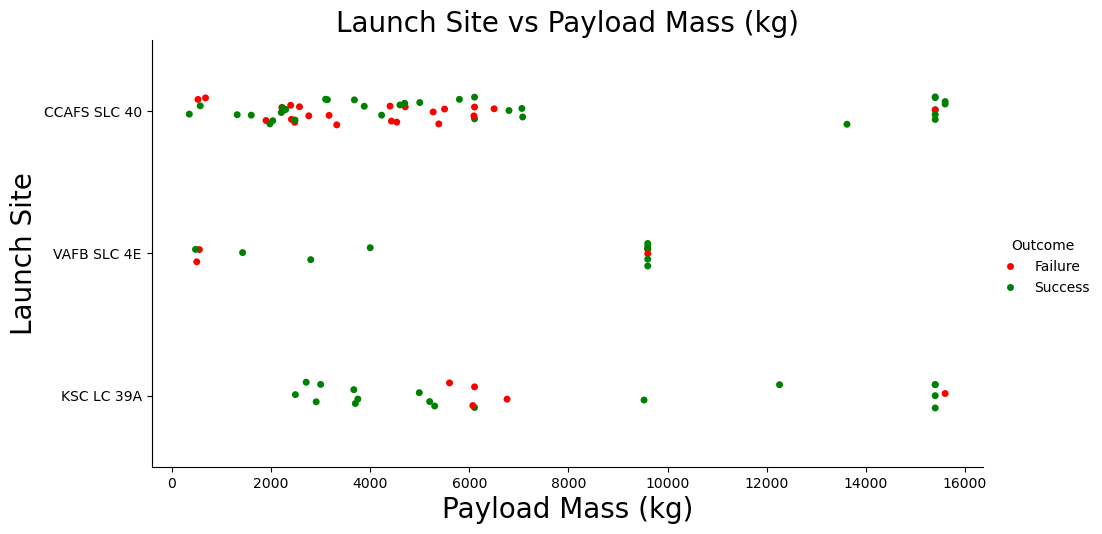

In [16]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", data = df, hue = "Outcome", aspect = 2, palette = success_palette)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Launch Site vs Payload Mass (kg)", fontsize=20)
plt.show()
plt.close()

#### TASK 3: Visualize the relationship between success rate of each orbit type

In [18]:
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


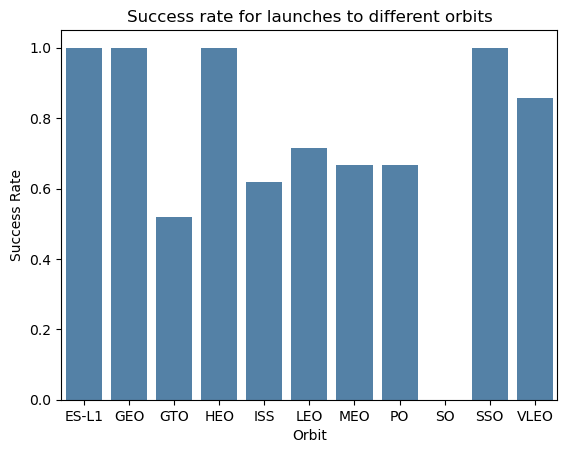

In [22]:
sns.barplot(y = "Class", x = "Orbit", data = orbit_success_rate, color = 'steelblue')
plt.title("Success rate for launches to different orbits")
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()
plt.close()

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type

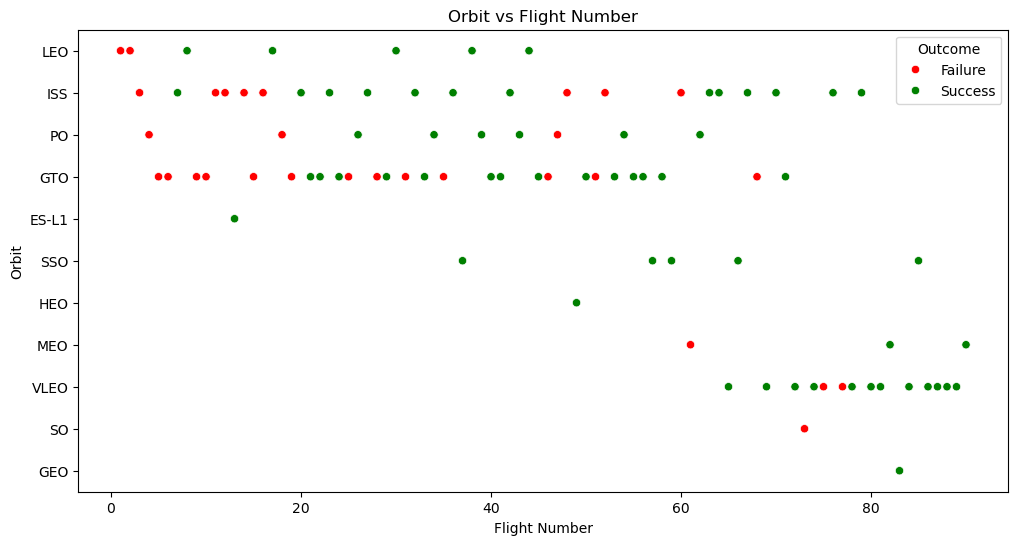

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = "FlightNumber", y = "Orbit", data = df, hue = "Outcome", palette = success_palette)
plt.title("Orbit vs Flight Number")
plt.ylabel("Orbit")
plt.xlabel("Flight Number")
plt.show()
plt.close()

#### TASK 5: Visualize the relationship between Payload Mass and Orbit type

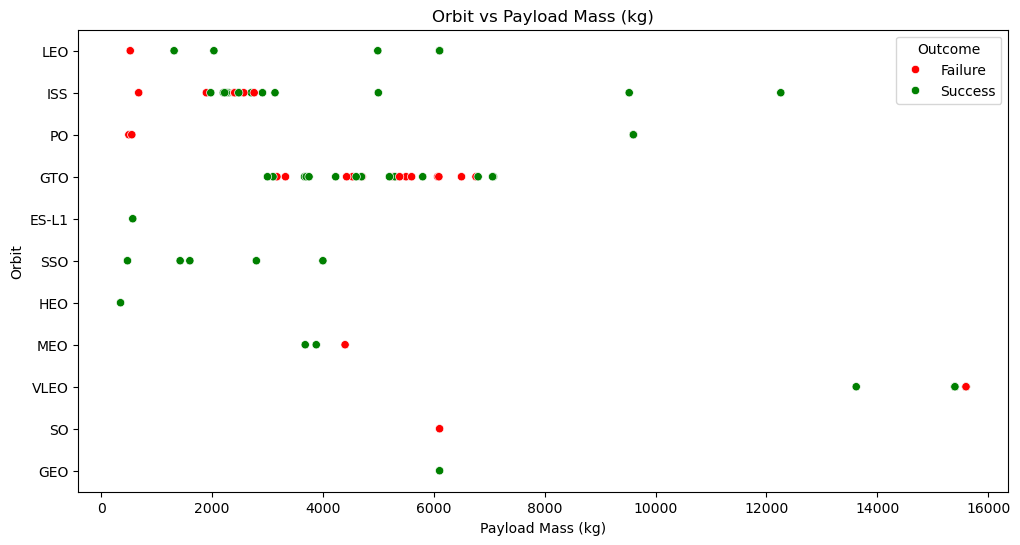

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = "PayloadMass", y = "Orbit", data = df, hue = "Outcome", palette = success_palette)
plt.title("Orbit vs Payload Mass (kg)")
plt.ylabel("Orbit")
plt.xlabel("Payload Mass (kg)")
plt.show()
plt.close()

#### TASK 6: Visualize the launch success yearly trend

In [39]:
# Define a function to return the year from the date

year = []
def get_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
get_year()
df["Date"] = year
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,Failure,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,Failure,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,Failure,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,Failure,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,Failure,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [41]:
year_success_rate = df.groupby("Date")["Class"].mean().reset_index()
year_success_rate

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


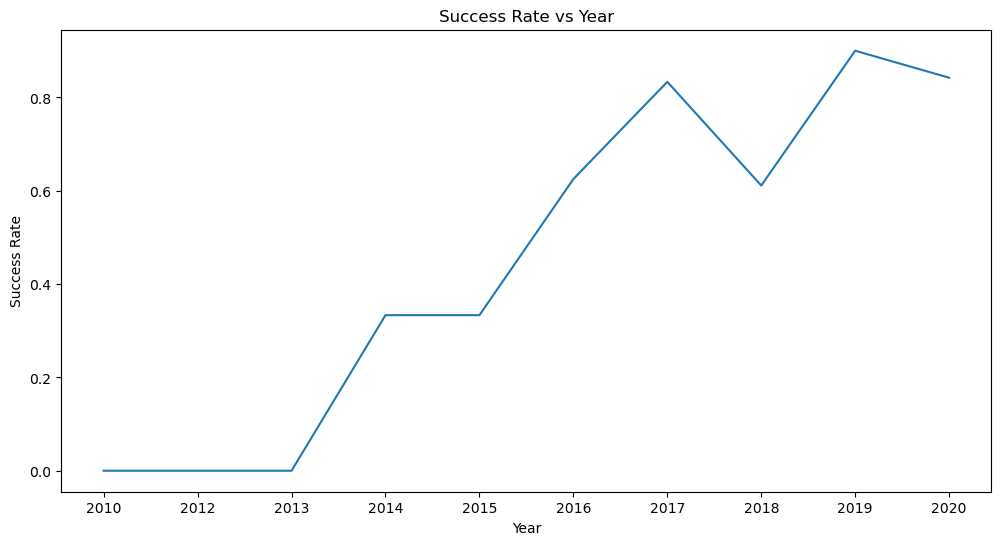

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = "Date", y = "Class", data = year_success_rate)
plt.title("Success Rate vs Year")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()
plt.close()

## Features Engineering

In [75]:
# Extract the important features to be used in predicting the success of future launches

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(3)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007


In [76]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


#### TASK 7: Create dummy variables to categorical columns

In [55]:
categorical_cols = features.select_dtypes(include=["object", "category"])
categorical_cols.head(3)

,Orbit,LaunchSite,LandingPad,Serial
0,LEO,CCAFS SLC 40,NaN,B0003
1,LEO,CCAFS SLC 40,NaN,B0005
2,ISS,CCAFS SLC 40,NaN,B0007


In [69]:
features_one_hot = pd.get_dummies(categorical_cols, dtype = int).reset_index()
features_one_hot.head(3)

,index,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
features_one_hot = features_one_hot.reset_index(drop=True)
numeric_features = features.select_dtypes(include=["number"]).reset_index(drop=True)

In [71]:
features_one_hot = features_one_hot + numeric_features

#### TASK 8: Cast all numeric columns to float64

In [72]:
features_one_hot = features_one_hot.astype("float64") 

In [73]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 78 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Block                                0 non-null      float64
 1   FlightNumber                         0 non-null      float64
 2   Flights                              0 non-null      float64
 3   LandingPad_5e9e3032383ecb267a34e7c7  0 non-null      float64
 4   LandingPad_5e9e3032383ecb554034e7c9  0 non-null      float64
 5   LandingPad_5e9e3032383ecb6bb234e7ca  0 non-null      float64
 6   LandingPad_5e9e3032383ecb761634e7cb  0 non-null      float64
 7   LandingPad_5e9e3033383ecbb9e534e7cc  0 non-null      float64
 8   LaunchSite_CCAFS SLC 40              0 non-null      float64
 9   LaunchSite_KSC LC 39A                0 non-null      float64
 10  LaunchSite_VAFB SLC 4E               0 non-null      float64
 11  Orbit_ES-L1                       

In [74]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)